In [185]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [169]:
t_bh = np.loadtxt("Data/triple_times.txt")

In [170]:
z_bh = z_at_value(WMAP9.age, (t_bh/10**9)*u.Gyr, zmax=1000)

In [171]:
z_bh = np.array(z_bh)

In [172]:
np.max(z_bh)

3.2761646414750767

In [173]:
np.min(z_bh)

0.0017927551536701253

In [174]:
zmax = 4
zbinsize = 0.01

In [175]:
boxsize = 75.0
omega_m = 0.2726
omega_l = 0.7274
h = 0.704
vol_comov_box = (boxsize/h)**3 #Mpc^3

In [186]:
lgzbinsize = 0.2
lgzmin = -3.0
lgzmax = 1.0

In [187]:
lgz_bh = np.log10(z_bh)

In [188]:
Nmrg_lgzhist,lgzbin_edges = np.histogram(lgz_bh,range=(lgzmin,lgzmax),
                                             bins=int((lgzmax-lgzmin)/lgzbinsize))

In [189]:
lgzbins = lgzbin_edges[:-1]+0.5*lgzbinsize

In [190]:
Nmrg_lgzhist = Nmrg_lgzhist.astype('float64')

In [191]:
Nmrg_lgzhist[Nmrg_lgzhist==0] = 1.0e-10

In [192]:
WMAP9.age(1)

<Quantity 5.92222843 Gyr>

In [193]:
cosmo.age(10**(lgzbins[0]-0.5*lgzbinsize))

<Quantity 13.75480371 Gyr>

In [194]:
dt_lgzbins = []

In [195]:
for i in range(lgzbins.size):
    zatage = cosmo.age(10**(lgzbins[i]-0.5*lgzbinsize))-cosmo.age(10**(lgzbins[i]+0.5*lgzbinsize))
    print(zatage)
    dt_lgzbins.append(float(zatage/u.Gyr))

0.008234972846311805 Gyr
0.013037461153345475 Gyr
0.020627650471617187 Gyr
0.03260411908249239 Gyr
0.05145271980997812 Gyr
0.08099500633215584 Gyr
0.12699700453684137 Gyr
0.1978914214479932 Gyr
0.30536329245277116 Gyr
0.4640580491808244 Gyr
0.6886936856782295 Gyr
0.9854663625185491 Gyr
1.3343882189275877 Gyr
1.6658160876587615 Gyr
1.8569492307771656 Gyr
1.795011141893072 Gyr
1.4867273352285975 Gyr
1.0687962253949832 Gyr
0.6864194124146012 Gyr
0.406100124011114 Gyr


In [196]:
dt_lgzbins

[0.008234972846311805,
 0.013037461153345475,
 0.020627650471617187,
 0.03260411908249239,
 0.05145271980997812,
 0.08099500633215584,
 0.12699700453684137,
 0.1978914214479932,
 0.30536329245277116,
 0.4640580491808244,
 0.6886936856782295,
 0.9854663625185491,
 1.3343882189275877,
 1.6658160876587615,
 1.8569492307771656,
 1.795011141893072,
 1.4867273352285975,
 1.0687962253949832,
 0.6864194124146012,
 0.406100124011114]

In [197]:
dt_lgzbins = np.array(dt_lgzbins)

In [198]:
from astropy import constants as const

In [199]:
def unit_comoving_vol(z):

    D_H = const.c.to('km/s').value/cosmo.H0.value

    #return  D_H * cosmo.D_M(0.0,z)**2 / np.sqrt(omega_m*(1+z)**3 + omega_l) 
    return D_H * cosmo.comoving_transverse_distance(z).value**2 * cosmo.inv_efunc(z)

In [200]:
unit_comoving_vol(z_bh)

array([4.11909725e+10, 3.06740874e+10, 4.22939811e+10, 4.11341302e+10,
       3.49769216e+10, 2.80109197e+09, 3.69743138e+10, 8.57032802e+09,
       4.25770482e+10, 3.91756513e+10, 1.03370473e+10, 1.66917190e+10,
       4.20728947e+10, 4.23668712e+10, 3.68707040e+10, 3.16310766e+10,
       8.51250147e+07, 4.25695985e+10, 3.80725462e+10, 3.44748184e+10,
       2.30925263e+10, 4.15680727e+10, 3.22127670e+10, 4.25747504e+10,
       3.60120366e+10, 2.25721490e+10, 3.96853488e+10, 4.21093255e+10,
       8.48564219e+09, 8.49404745e+09, 3.09592280e+10, 1.46148255e+09,
       4.24298616e+10, 1.91262232e+10, 5.45854335e+08, 8.89689694e+09,
       4.08968209e+10, 3.45589100e+10, 7.86929127e+09, 4.25808123e+10,
       8.95871240e+09, 3.97597150e+10, 3.45599511e+10, 4.25750388e+10,
       3.78940879e+10, 3.96853652e+10, 2.26507881e+10, 1.94465823e+10,
       1.38021884e+07, 2.96213200e+10, 4.25671820e+10, 4.06418075e+10,
       2.96064687e+10, 4.17896229e+09, 7.39862491e+09, 1.05138361e+10,
      

In [201]:
cosmo.differential_comoving_volume(z_bh)

<Quantity [4.11909725e+10, 3.06740874e+10, 4.22939811e+10, 4.11341302e+10,
           3.49769216e+10, 2.80109197e+09, 3.69743138e+10, 8.57032802e+09,
           4.25770482e+10, 3.91756513e+10, 1.03370473e+10, 1.66917190e+10,
           4.20728947e+10, 4.23668712e+10, 3.68707040e+10, 3.16310766e+10,
           8.51250147e+07, 4.25695985e+10, 3.80725462e+10, 3.44748184e+10,
           2.30925263e+10, 4.15680727e+10, 3.22127670e+10, 4.25747504e+10,
           3.60120366e+10, 2.25721490e+10, 3.96853488e+10, 4.21093255e+10,
           8.48564219e+09, 8.49404745e+09, 3.09592280e+10, 1.46148255e+09,
           4.24298616e+10, 1.91262232e+10, 5.45854335e+08, 8.89689694e+09,
           4.08968209e+10, 3.45589100e+10, 7.86929127e+09, 4.25808123e+10,
           8.95871240e+09, 3.97597150e+10, 3.45599511e+10, 4.25750388e+10,
           3.78940879e+10, 3.96853652e+10, 2.26507881e+10, 1.94465823e+10,
           1.38021884e+07, 2.96213200e+10, 4.25671820e+10, 4.06418075e+10,
           2.96064687e+10

In [202]:
dVcratio = np.array([unit_comoving_vol(z) 
                                  for z in z_bh ]) * 4*np.pi/vol_comov_box

In [203]:
#all sky 

#dNmrg_dlgzdt = np.array([Nmrg_lgzhist[i]/dt_lgzbins[i]/vol_comov_box *
                             #10**lgzbins[i]*np.log(10)
                             #for i in range(lgzbins.size)]) ## yr^-1

In [204]:
dNmrgdlogz,tmp = np.histogram(lgz_bh,weights=dVcratio,
                                                 bins=lgzbin_edges)

In [205]:
dNmrgdlogz[dNmrgdlogz==0] = 1.0e-10

In [210]:
dNmrgdlogzdt_allsky = np.array([dNmrgdlogz[i]/(dt_lgzbins[i]*10**9)/(1+zbins[i])
                                             for i in range(lgzbins.size)]) ## yr^-1

(-2.0, 1.0)

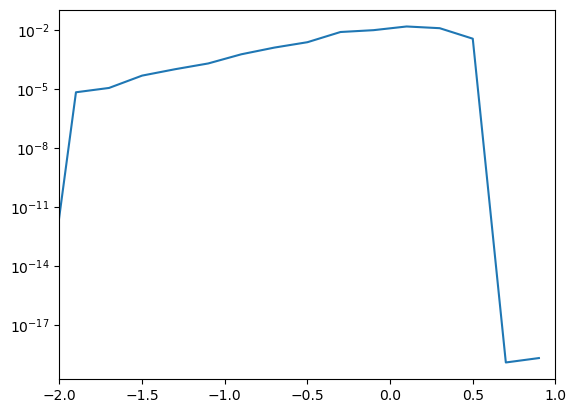

In [211]:
plt.plot(lgzbins,dNmrgdlogzdt_allsky)
plt.yscale("log")
plt.xlim(-2,1)

In [212]:
#merger rate 
np.sum(dNmrgdlogzdt_allsky*lgzbins) #yr^-1

0.0005738309839972048

In [176]:
Nmrg_zhist,zbin_edges = np.histogram(z_bh,range=(0,zmax),bins=int(zmax/zbinsize))

zbins = zbin_edges[:-1]+0.5*zbinsize


dVcratio = np.array([unit_comoving_vol(z) 
                                  for z in z_bh ]) * 4*np.pi/vol_comov_box

dNmrgdz,tmp = np.histogram(z_bh,weights=dVcratio,bins=zbin_edges)

In [177]:
dt_zbins = []

for i in range(zbins.size):
    zatage = cosmo.age(zbins[i]-0.5*zbinsize)-cosmo.age(zbins[i]+0.5*zbinsize)
    dt_zbins.append(float(zatage/u.Gyr))

dt_zbins = np.array(dt_zbins)

In [2]:
dNmrg_dzdt = np.array([dNmrgdz[i]/dt_zbins[i]/vol_comov_box/10**9
                           for i in range(zbins.size)]) ## yr^-1 cMpc^-3

print("total merger rate: ",np.sum(dNmrg_dzdt*zbinsize))

NameError: name 'np' is not defined

In [1]:
dNmrg_dzdt

NameError: name 'dNmrg_dzdt' is not defined

In [179]:
dNmrg_dzdt_allsky = np.array([dNmrgdz[i]/dt_zbins[i]/10**9
                                  for i in range(zbins.size)]) ## yr^-1

print("total all-sky merger rate [yr^-1]: ",np.sum(dNmrg_dzdt_allsky*zbinsize))

total all-sky merger rate [yr^-1]:  0.03470882382862961


In [208]:
def merger_rates(z_filtered):
    
    dz              = 0.1
    bins            = np.arange(0,10+dz/2,dz)
    N,binl,dummy    = plt.hist(z_filtered, bins=bins)
    dN              = -(N[1:]-N[:-1])
    

        
    HUBBLE_CONSTANT_SEC = (cosmo.H(0).value/(3.086*10**19))       #1/s
    HUBBLE_TIME_YR      = (1/HUBBLE_CONSTANT_SEC)/(365.25*24*60*60)  #yr

    #bin centers are going to be the z values for comoving volume
    bin_centers = np.array((binl[:-1]+binl[1:])/2  )
    V_C         = WMAP9.comoving_volume(bin_centers)
    dV_C        = WMAP9.differential_comoving_volume(bin_centers)
    N_Vc        = np.array(N)/(dz*(106.5**3))
    dzdt        = WMAP9.efunc(bin_centers)*(1+bin_centers)/HUBBLE_TIME_YR 

    
    factor      = np.array(1/(1+bin_centers))       #1/(1+z)
    
    plt.plot(bin_centers,N_Vc)
    plt.yscale("log")
    plt.show()
    
    integrand = N_Vc*dzdt*dV_C*factor*dz*4*np.pi
    print ('\nThe dN is:')
    print (min(integrand),max(integrand))
    #integrand = N_Vc[:-1]*dzdt[:-1]*dV_C*factor[:-1]#*dz
    print (integrand.shape)
    print ('Merger rate is:',np.sum(integrand))

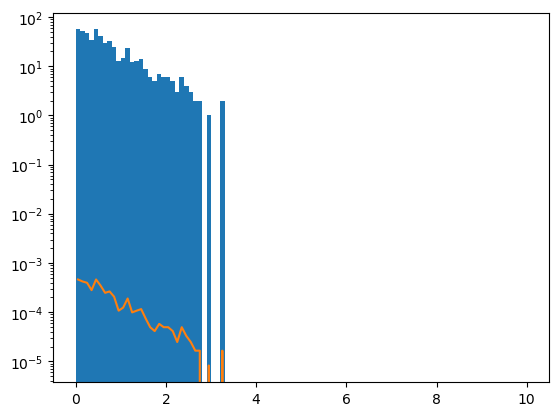


The dN is:
0.0 Mpc3 / sr 0.0010160122199107046 Mpc3 / sr
(100,)
Merger rate is: 0.01392456131213474 Mpc3 / sr


In [209]:
merger_rates(z_bh)

In [150]:
mID1 = np.loadtxt("Data/merger_ids1.txt")

In [151]:
mID2 = np.loadtxt("Data/merger_ids2.txt")

In [152]:
mID1.astype(int)

array([[9223372036854775807, 9223372036854775807],
       [9223372036508590080, 9223372036739678208],
       [9223372036649464832, 9223372036820333568],
       ...,
       [9223372036854775807, 9223372036854775807],
       [9223372036854775807, 9223372036854775807],
       [9223372036854775807, 9223372036854775807]])

In [168]:
for i in range(2):
    print(int(mID1[1,i]))

9223372036508590080
9223372036739678208


In [169]:
for i in range(2):
    print(int(mID2[1,i]))

3402508881721836544
9223372036739678208


In [113]:
mID2.astype(int)

array([[9223372036720251904, 9223372036854775807],
       [3402508881721836544, 9223372036739678208],
       [9223372036820333568, 9223372036854775807],
       ...,
       [9223372036854775807, 9223372036854775807],
       [9223372036854775807, 9223372036854775807],
       [9223372036854775807, 9223372036854775807]])

In [133]:
m1_masses = np.loadtxt("Data/m1-merger-masses.txt")
m2_masses = np.loadtxt("Data/m2-merger-masses.txt")

In [134]:
m1_masses

array([[32865814.11640726, 12537813.06187016],
       [10594043.35175365,  2885123.85349061],
       [16551621.82549644,  6537747.19772783],
       ...,
       [13253183.13745745,  8303174.95061583],
       [45751336.48353241,  9468752.32073077],
       [50987708.54564039,  2248239.00742812]])

In [136]:
m2_masses

array([[5.27682881e+07, 8.20473826e+06],
       [3.13274923e+08, 4.21176138e+07],
       [7.25740577e+07, 4.65394549e+07],
       ...,
       [2.15887632e+07, 6.82327325e+06],
       [5.55505589e+07, 5.33896945e+07],
       [5.55505589e+07, 5.33896945e+07]])

In [171]:
m2_masses[]

8204738.256013711

In [143]:
ID_size = np.shape(mID1)[0]

In [173]:
m1_list = []
m2_list = []
m3_list = []

In [174]:
for i in range(ID_size):

    
    if(mID1[i,0]==mID2[i,0]):
        
        m2 = m2_masses[i,0]
        m2_old = m1_masses[i,0]
        qin_old = m1_masses[i,1]/m2_old
        m1 = qin_old * m2
        m3 = m2_masses[i,1]
        
    
    elif(mID1[i,1]==mID2[i,0]):
        
        m2 = m2_masses[i,0]
        m2_old = m1_masses[i,1]
        qin_old = m1_masses[i,0]/m2_old
        m1 = qin_old * m2
        m3 = m2_masses[i,1]        
    
    elif(mID1[i,0]==mID2[i,1]):
        m2 = m2_masses[i,1]
        m2_old = m1_masses[i,0]
        qin_old = m1_masses[i,1]/m2_old
        m1 = qin_old * m2
        m3 = m2_masses[i,0]
    
    elif(mID1[i,1]==mID2[i,1]):
        m2 = m2_masses[i,1]
        m2_old = m1_masses[i,1]
        qin_old = m1_masses[i,0]/m2_old
        m1 = qin_old * m2
        m3 = m2_masses[i,0]   
        
    m1_list.append(m1)
    m2_list.append(m2)
    m3_list.append(m3)
    

In [180]:
print(m1_list[0],m2_list[0],m3_list[0])

21507371.426361017 8204738.256013711 52768288.05172233


In [186]:
M1 = []
qin = []
qout = []

In [187]:
for i in range(len(m1_list)):
    
    if(m1_list[i] > m2_list[i]):
        m1_big = m1_list[i]
        m2_small = m2_list[i]
    else:
        m1_big = m2_list[i]
        m2_small = m1_list[i]
    
    M1.append(m1_big)
    qin.append(m2_small/m1_big)
    qout.append(m3_list[i]/(m1_big+m2_small))

In [202]:
np.savetxt("Data/triple-masses-from-illustris.txt",np.column_stack((M1,qin,qout)))

In [191]:
import matplotlib.pyplot as plt

In [197]:
print(m1_list[0],m2_list[0],m3_list[0])

21507371.426361017 8204738.256013711 52768288.05172233


In [198]:
print(m3_list[0]/(m1_list[0]+m2_list[0]))

1.775985906615866
